In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#checking library versions
print("Numpy -> " + np.__version__)
print("Pandas -> " + pd.__version__)
print("Tensorflow -> " + tf.__version__)
print("Keras -> " + keras.__version__)

Numpy -> 1.20.1
Pandas -> 1.2.4
Tensorflow -> 2.3.0
Keras -> 2.4.0


In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\migot\\Desktop\\DriveAI'

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
def load_images(name, path):
    img = Image.open(path + "/" + name)
    img = np.array(img)
    seg = img[:256, 256:]
    img = img[:256, 0:256]
    
    #return img, seg
    return img/255, seg/255

In [15]:
def create_dataset(train_path, test_path):
    train_img_dataset = []
    train_seg_dataset = []
    valid_img_dataset = []
    valid_seg_dataset = []
    #train dataset - 2975
    files = os.listdir(train_path)[0:200]
    for file in files:
        X, y = load_images(file, train_path)
        train_img_dataset.append(X)
        train_seg_dataset.append(y)
    
    #validation/test dataset - 500
    files = os.listdir(test_path)[0:50]
    for file in files:
        X, y = load_images(file, train_path)
        valid_img_dataset.append(X)
        valid_seg_dataset.append(y)
    
    return train_img_dataset, train_seg_dataset, valid_img_dataset, valid_seg_dataset

In [16]:
train_path = cwd + "/data/train"
test_path = cwd + "/data/val"


X_train, y_train, X_valid, y_valid = create_dataset(train_path, test_path)

In [17]:
X_train = np.stack([i.tolist() for i in X_train])
y_train = np.stack([i.tolist() for i in y_train])
X_valid = np.stack([i.tolist() for i in X_valid])
y_valid = np.stack([i.tolist() for i in y_valid])

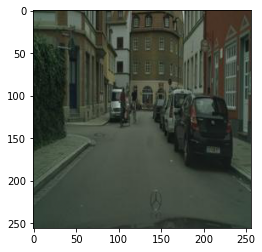

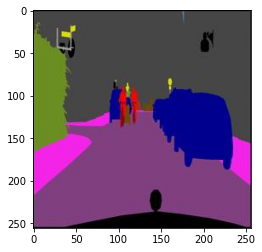

In [18]:
plt.imshow(X_train[100])
plt.show()
plt.imshow(y_train[100])
plt.show()

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=[256,256,3]),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(1024, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(1024, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(3, (1, 1), activation="sigmoid")
])

In [20]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     7

In [ ]:
clb = [keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True)]
h = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), validation_steps=10, steps_per_epoch=10, callbacks=clb, verbose=2)

In [22]:
model.load_weights('modelv2.h5')

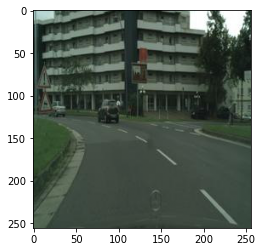

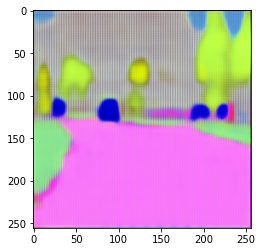

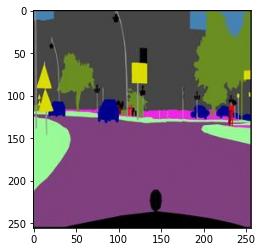

In [23]:
index = 0
x = np.stack([X_valid[index].tolist()])
pred = model.predict(x)
plt.imshow(X_valid[index])
plt.show()
predx = np.squeeze(pred)
plt.imshow(predx)
plt.show()
plt.imshow(y_valid[index])
plt.show()